# LEVEL 3
# TASK 1: Restaurent Reviews
# (A)Analyze the text reviews to identify the most common positive and negative keywords.

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
df=pd.read_csv('C:\\Users\\piyus\\Downloads\\Dataset .csv')

In [12]:
reviews = df['Rating text']
nltk.download('vader_lexicon')
df['Review text'] = df['Rating text'].fillna('')
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...


In [13]:
def get_sentiment_score(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = reviews.apply(get_sentiment_score)
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 'Positive' if score >= 0 else 'Negative')

In [14]:
positive_keywords = {}
negative_keywords = {}

stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    words = nltk.word_tokenize(row['Review text'].lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

    for word in filtered_words:
        if row['Sentiment'] == 'Positive':
            positive_keywords[word] = positive_keywords.get(word, 0) + 1
        else:
            negative_keywords[word] = negative_keywords.get(word, 0) + 1

In [15]:
top_positive_keywords = dict(sorted(positive_keywords.items(), key=lambda item: item[1], reverse=True)[:10])
top_negative_keywords = dict(sorted(negative_keywords.items(), key=lambda item: item[1], reverse=True)[:10])


print("Top 10 Positive Keywords:", top_positive_keywords)
print("Top 10 Negative Keywords:", top_negative_keywords)

Top 10 Positive Keywords: {'average': 3737, 'good': 3179, 'rated': 2148, 'excellent': 301}
Top 10 Negative Keywords: {'poor': 186}


In [16]:
df['Review Length'] = df['Review text'].apply(lambda x: len(nltk.word_tokenize(x)))
average_review_length = df['Review Length'].mean()

In [18]:
import matplotlib.pyplot as plt

Average Review Length: 1.3378703800649148


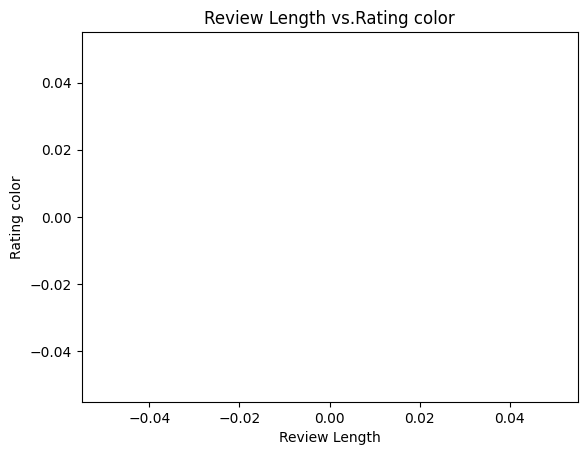

In [19]:
print("Average Review Length:", average_review_length)
df['Rating color'] = pd.to_numeric(df['Rating color'], errors='coerce')
average_length_by_rating = df.groupby('Rating color')['Review Length'].mean()
plt.scatter(df['Review Length'], df['Rating color'])
plt.xlabel('Review Length')
plt.ylabel('Rating color')
plt.title('Review Length vs.Rating color')
plt.show()

# (B) - Calculate the average length of reviews andexplore if there is a relationship between review length and rating.

In [23]:
correlation_coefficient = df['Review Length'].corr(df['Rating color'])
print("Correlation Coefficient between Review Length and Rating color:", correlation_coefficient)

Correlation Coefficient between Review Length and Rating color: nan


# LEVEL 3
# TASK 2 : Votes Analysis
# (A) - Identify the restaurants with the highest and lowest number of votes.

In [25]:
restaurant_with_highest_votes = df.loc[df["Votes"].idxmax()]
restaurant_with_lowest_votes = df.loc[df["Votes"].idxmin()]
print("Restaurant with the highest number of votes:")
print(restaurant_with_highest_votes)

Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

In [26]:
print("\nRestaurant with the lowest number of votes:")
print(restaurant_with_lowest_votes)


Restaurant with the lowest number of votes:
Restaurant ID                                                     6710645
Restaurant Name                                          Cantinho da Gula
Country Code                                                           30
City                                                           S��o Paulo
Address                 Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...
Locality                                                       Itaim Bibi
Locality Verbose                                   Itaim Bibi, S��o Paulo
Longitude                                                      -46.675667
Latitude                                                          -23.581
Cuisines                                                        Brazilian
Average Cost for two                                                   55
Currency                                               Brazilian Real(R$)
Has Table booking                                                  

# (B) - Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [27]:
df["Votes"] = pd.to_numeric(df["Votes"])
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"])
correlation = df["Votes"].corr(df["Aggregate rating"])
print("\nCorrelation between number of votes and rating:", correlation)


Correlation between number of votes and rating: 0.31369058419541135


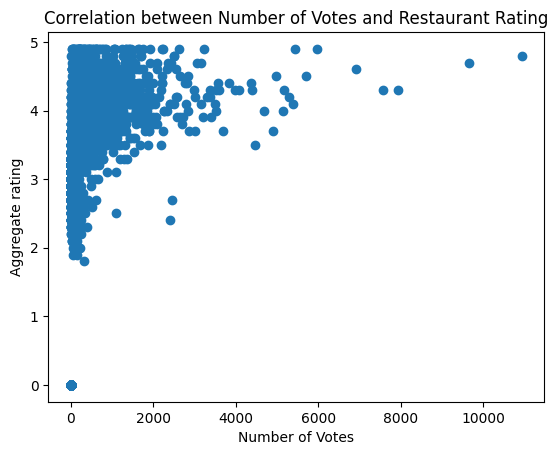

In [28]:
plt.scatter(df["Votes"], df["Aggregate rating"])
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate rating")
plt.title("Correlation between Number of Votes and Restaurant Rating")
plt.show()

# LEVEL 3
# Task 3 : Price Range vs. Online Delivery and Table Booking
# (A) - Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [29]:
price_ranges = df["Price range"].unique()
online_delivery_percentages = []
for price_range in price_ranges:
    restaurants_with_delivery = df[(df["Price range"] == price_range) & (df["Has Online delivery"] == True)]
    total_restaurants = len(df[df["Price range"] == price_range])
    percentage_with_delivery = (len(restaurants_with_delivery) / total_restaurants) * 100
    online_delivery_percentages.append(percentage_with_delivery)
table_booking_percentages = []

In [30]:
for price_range in price_ranges:
    restaurants_with_table_booking = df[(df["Price range"] == price_range) & (df["Has Table booking"] == True)]
    total_restaurants = len(df[df["Price range"] == price_range])
    percentage_with_table_booking = (len(restaurants_with_table_booking) / total_restaurants) * 100
    table_booking_percentages.append(percentage_with_table_booking)

In [31]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Percentage of Restaurants with Online delivery by Price Range')

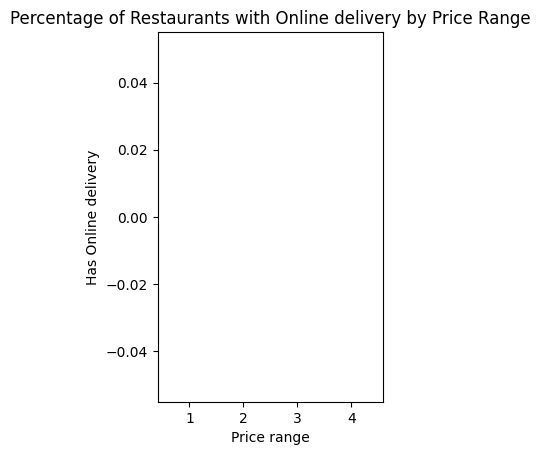

In [32]:
plt.subplot(1, 2, 1)
plt.bar(price_ranges, online_delivery_percentages)
plt.xlabel("Price range")
plt.ylabel("Has Online delivery")
plt.title("Percentage of Restaurants with Online delivery by Price Range")

# (B) - Determine if higher-priced restaurants are more likely to offer these services.

Text(0.5, 1.0, 'Percentage of Restaurants with Table Booking by Price Range')

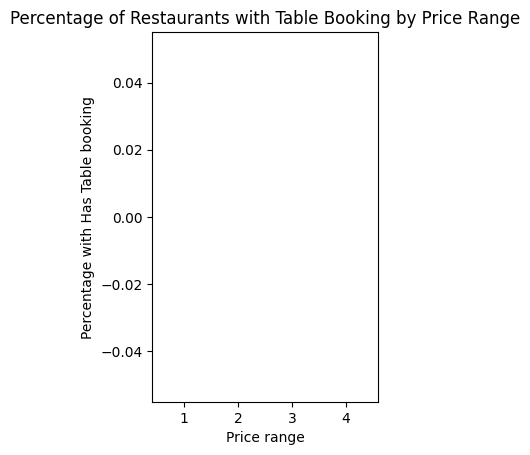

In [33]:
plt.subplot(1, 2, 2)
plt.bar(price_ranges, table_booking_percentages)
plt.xlabel("Price range")
plt.ylabel("Percentage with Has Table booking")
plt.title("Percentage of Restaurants with Table Booking by Price Range")